# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Being a user car dealership, we only want to take in cars that are 2nd hand. In order to determine which cars we should focus on, there is a need to determine which factors affect the price of the car which would in turn, determine how fast these factors move the car for a sale and what type of margin we can get on the car.

It is common knowledge that some factors like age and condition can potentially affect the car prices but we need to determine what is the norm in this market. As such, we need to explore the data and build a case for the type of vehicles the dealership will focus on selling in the market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.linalg import svd

from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

### Load the dataset and look at top 5 samples

In [2]:
# Read the dataset
cars = pd.read_csv('data/vehicles.csv')

# Display the top 5 rows of the dataset
cars.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# Because the head isn't meaningful with lots of NaN values, sample a random set of 20 samples instead to get a better view
cars.sample(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
184191,7313890324,eastern shore,18590,2017.0,mazda,mazda3 touring 2.5,good,NaN,gas,34723.0,clean,other,3MZBN1L35HM133963,fwd,NaN,hatchback,blue,md
404916,7306047148,kennewick-pasco-richland,4000,2007.0,toyota,camry,excellent,NaN,gas,194200.0,clean,automatic,NaN,fwd,NaN,NaN,red,wa
421471,7306151310,madison,9500,2011.0,subaru,forester premium,good,4 cylinders,gas,120935.0,clean,automatic,JF2SHBDC0BH768326,4wd,mid-size,SUV,green,wi
383807,7306252968,tyler / east TX,23495,2014.0,gmc,sierra,NaN,NaN,other,143212.0,clean,automatic,3GTP1VEC8EG182495,rwd,NaN,pickup,NaN,tx
75370,7301745836,colorado springs,27990,2011.0,mercedes-benz,cl-class cl 550,good,8 cylinders,gas,66944.0,clean,automatic,WDDEJ9EB1BA027275,NaN,NaN,coupe,black,co
337805,7307646918,pittsburgh,5500,2003.0,chevrolet,silverado,good,8 cylinders,gas,192425.0,clean,automatic,NaN,4wd,full-size,pickup,red,pa
170342,7301734030,wichita,3750,2007.0,mazda,3,NaN,NaN,gas,131000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,white,ks
421196,7307960611,madison,3800,2006.0,pontiac,g6,excellent,NaN,gas,131300.0,clean,automatic,NaN,fwd,NaN,NaN,green,wi
332922,7315439790,philadelphia,10395,2008.0,NaN,HUMMER H3,excellent,NaN,gas,157778.0,clean,automatic,NaN,4wd,NaN,SUV,white,pa
223815,7313810495,billings,31998,2020.0,mitsubishi,outlander phev sel,NaN,NaN,gas,5122.0,clean,automatic,JA4J24A57LZ009174,4wd,NaN,wagon,NaN,mt


### Explore the dataset

In [4]:
# Noted that there are many NaN values in many of the samples across the features. There are also many categorical features
# Look at the statistics of the numerical features in the dataset
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
# Noting that there are only 4 numerical features.. lets look at all the features in the dataset
cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [6]:
# Check the data types that are available within the dataset
cars.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [7]:
# Lets look at the chepeast and most expensive cars available
cars_min = cars['price'].min()
cars_max = cars['price'].max()
print(f'The lowest priced car is ${cars_min}')
print(f'The highest priced car is ${cars_max}')
print('There seem to be some unusually highly priced vehicles in the data which should be removed.')

The lowest priced car is $0
The highest priced car is $3736928711
There seem to be some unusually highly priced vehicles in the data which should be removed.


In [8]:
# Let us look at the oldest sample
cars_oldest = int(cars['year'].min())
print(f'The oldest car was from the year {cars_oldest}')

The oldest car was from the year 1900


In [9]:
# Let us look at the newest sample
cars_newest = int(cars['year'].max())
print(f'The newest car was from the year {cars_newest}')

The newest car was from the year 2022


In [10]:
# Let us look at the total number of vehicles sold in 2022
totalsoldin2022 = cars['year'].eq(2022).sum()

print(f'The total number of vehicles sold in 2022 was {totalsoldin2022}.')

The total number of vehicles sold in 2022 was 133.


In [11]:
# Let us look at type of cylinders these vehicles have a spread across
cars['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [12]:
# Numbers to show all the unique values from each feature
cars.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [13]:
# Check for missing values and print them out in a table

total_missing = cars.isnull().sum().sort_values(ascending=False)
percent_1 = cars.isnull().sum()/cars.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
size,306361,71.8
cylinders,177678,41.6
condition,174104,40.8
VIN,161042,37.7
drive,130567,30.6
paint_color,130203,30.5
type,92858,21.8
manufacturer,17646,4.1
title_status,8242,1.9
model,5277,1.2


It is clear that most of the missing values are associated with the 'size' column of which 70+% of the samples are having null values.

### Visualize the best-sellers

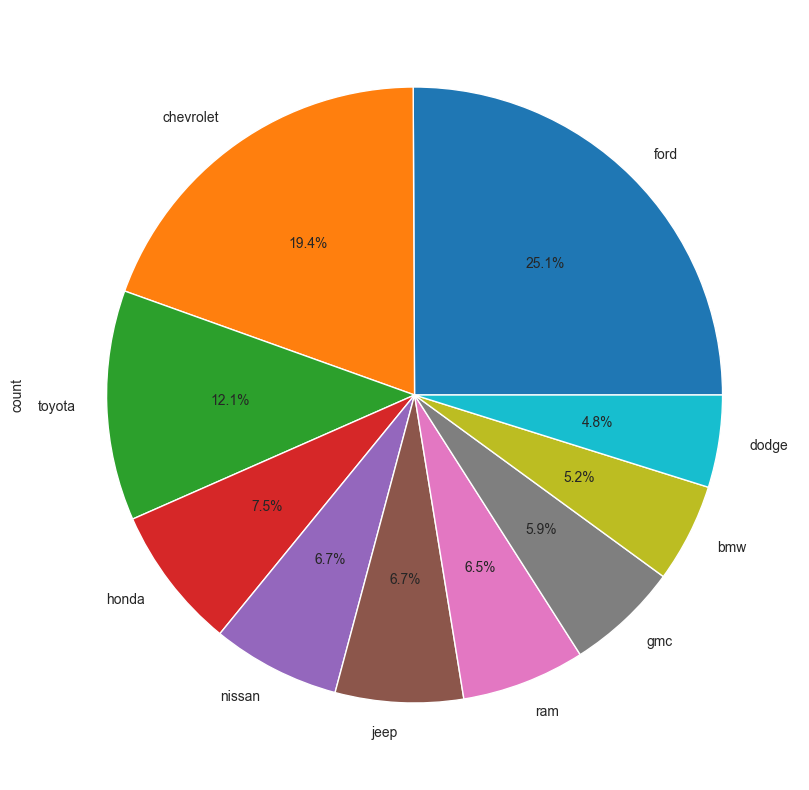

In [14]:
# Find the best-selling brands by applying a filter within the dataframe
top_car_brands = cars['manufacturer'].value_counts().head(10).index
top_cars = cars[cars['manufacturer'].isin(top_car_brands)]

# Plot a pie chart to show the distribution of brands
plt.figure(figsize=(10,10))
cars['manufacturer'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.savefig('data/images/piechart_of_top10brands.png',dpi=100,bbox_inches = 'tight')
plt.show()

Chevrolet, Ford and Toyota make up the lions share of the market.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [15]:
# Create a copy of the DataFrame for cleaning
cars_cleaned = cars.copy()

In [16]:
"""
Based on our goal to understand the leading indicators affecting the price of cars in this dataset, we will remove features
that are more of identifiers and unlikely to have any impact on pricing of the cars such as id & VIN and put that into a new dataframe
identified as cars_cleaned which will serve as our dataframe target for cleaning.

We will also remove the size feature which we previously observed as having most of the NaN values.
"""
cars_cleaned.drop(columns=['id','VIN','size'], axis = 1, inplace=True)

In [17]:
# Now check again for missing data stats

total_missing = cars_cleaned.isnull().sum().sort_values(ascending=False)
percent_1 = cars_cleaned.isnull().sum()/cars_cleaned.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
cylinders,177678,41.6
condition,174104,40.8
drive,130567,30.6
paint_color,130203,30.5
type,92858,21.8
manufacturer,17646,4.1
title_status,8242,1.9
model,5277,1.2
odometer,4400,1.0
fuel,3013,0.7


In [18]:
# Condition likely has an impact on price, but we can't work with selling used cars where the condition is unknown. Therefore, we drop samples like that
cars_cleaned.dropna(subset=['condition'], inplace=True)

# Working with cars where we don't know the type of car will make it hard to position to customers and align with price. Therefore, we drop samples like that
cars_cleaned.dropna(subset=['type'], inplace=True)

In [19]:
# Since these are supposed to be used cars, lets check for some 0 values in odometer, which should not be the case
print(cars_cleaned['odometer'].eq(0).sum())

"""
1965 cars having 0 on the odometer despite being used suggests that these cars odometers have been potentially illegally modified. Or they could be completely new cars
These samples should be dropped entirely as they would have a negative impact on the hypothesis.
"""
cars_cleaned.drop(cars_cleaned[cars_cleaned['odometer'] == 0].index, inplace = True)

618


In [20]:
# Check to ensure these 0 mileage cars have actually been dropped.
print(cars_cleaned['odometer'].eq(0).sum())

0


In [21]:
# Check to ensure these columns have indeed been dropped
cars_cleaned.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [22]:
# Check for outliers for cars with unusual prices of more than 100000
print(sum(cars_cleaned['price'] > 100000))

218


In [23]:
# Remove outliers all cars with unusual prices of more than 100000 and check again
cars_cleaned.drop(cars_cleaned[cars_cleaned['price'] > 100000].index, inplace = True)
print(sum(cars_cleaned['price'] > 100000))

0


In [24]:
# Check for cars that are in new condition
print(cars_cleaned['condition'].eq('new').sum())

806


In [25]:
# Now we remove any cars that are new as we only want to look at used cars and check again
cars_cleaned.drop(cars_cleaned[cars_cleaned['condition'] == 'new'].index, inplace = True)
print(cars_cleaned['condition'].eq('new').sum())

0


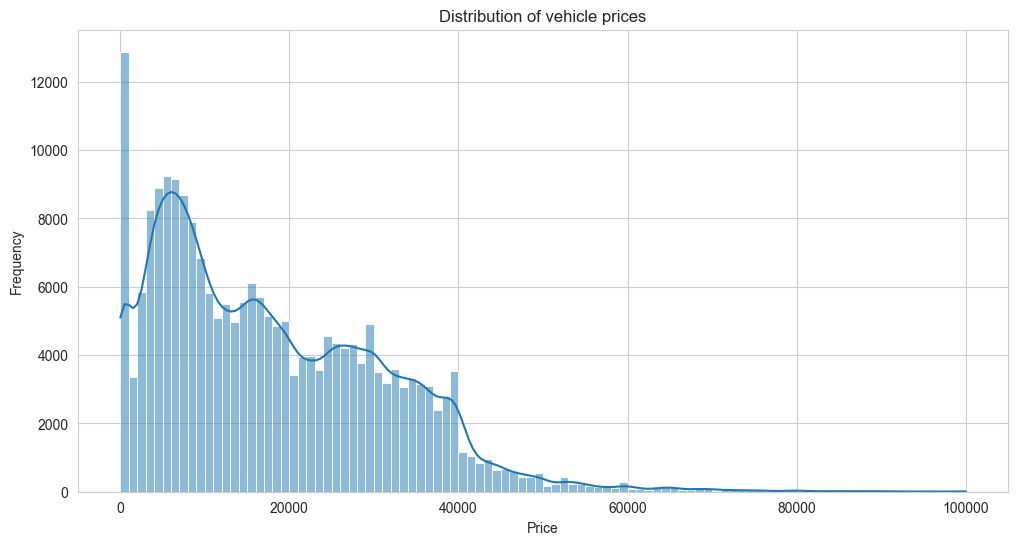

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(cars_cleaned['price'],kde=True,bins=100)
plt.title('Distribution of vehicle prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('data/images/distributionofvehicleprices.png',dpi=100,bbox_inches = 'tight')
plt.show()

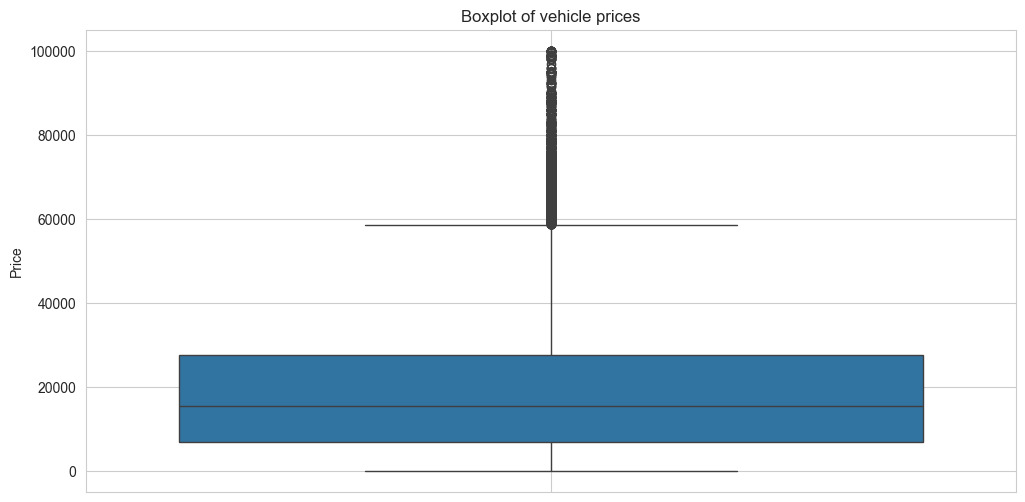

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(cars_cleaned['price'])
plt.title('Boxplot of vehicle prices')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('data/images/boxplotofvehicleprices.png',dpi=100,bbox_inches = 'tight')
plt.show()

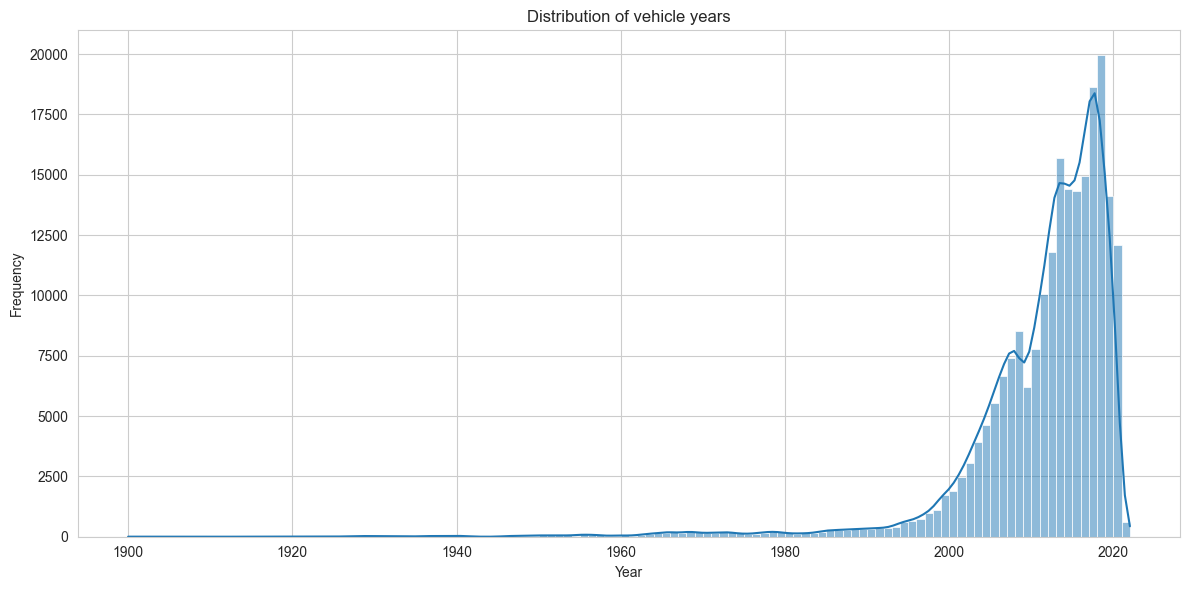

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(cars_cleaned['year'],kde=True,bins=int(cars_cleaned['year'].max() - cars_cleaned['year'].min()))
plt.title('Distribution of vehicle years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('data/images/distributionofvehicleyears.png',dpi=100,bbox_inches = 'tight')
plt.show()

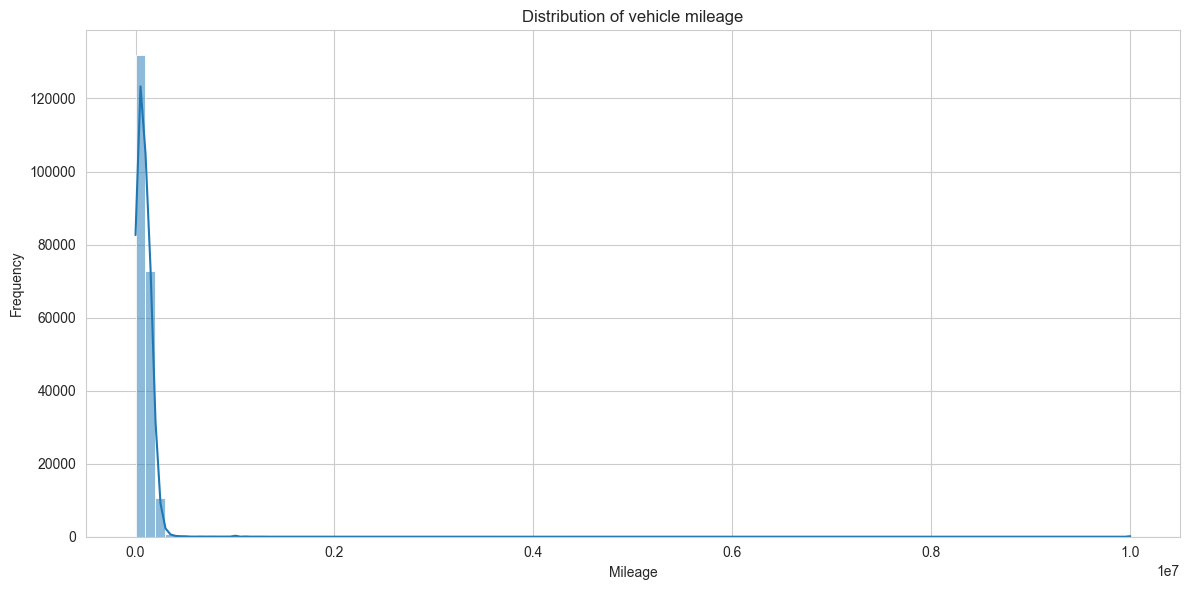

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(cars_cleaned['odometer'],kde=True, bins=100)
plt.title('Distribution of vehicle mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('data/images/distributionofvehiclemileage.png',dpi=100,bbox_inches = 'tight')
plt.show()

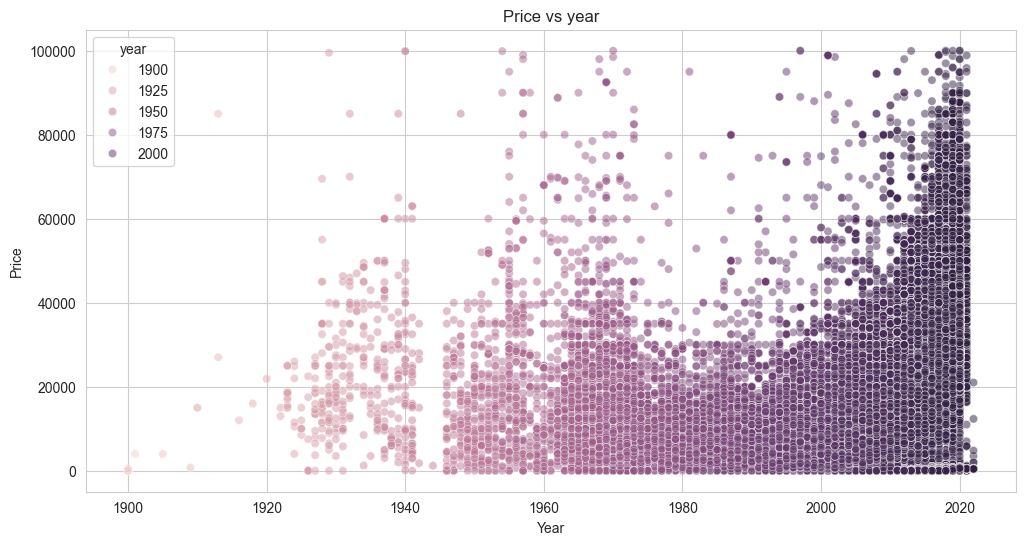

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year',y='price',data=cars_cleaned,hue='year',alpha=0.5)
plt.title('Price vs year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('data/images/pricevsyear.png',dpi=100,bbox_inches = 'tight')
plt.show()

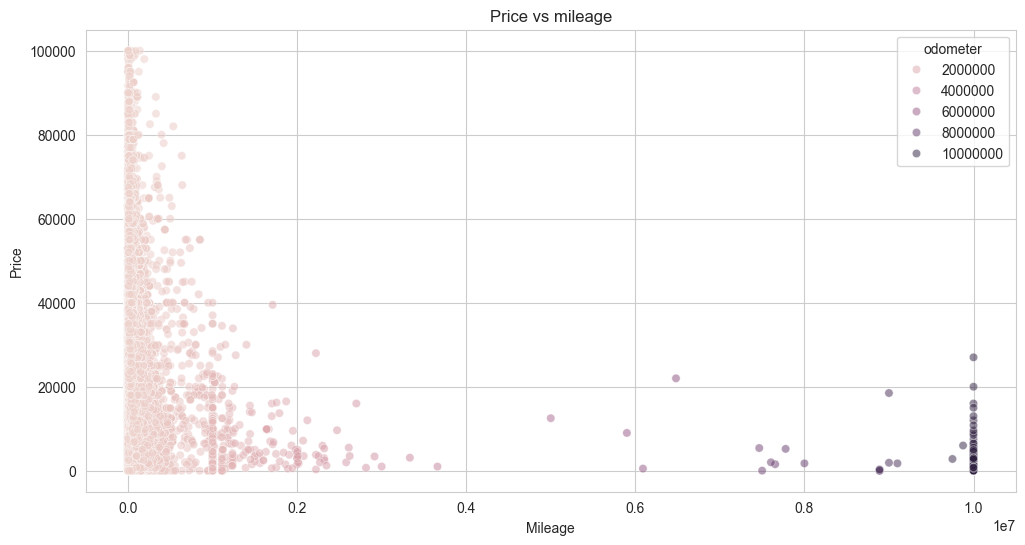

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer',y='price',data=cars_cleaned,hue='odometer',alpha=0.5)
plt.title('Price vs mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('data/images/pricevsmileage.png',dpi=100,bbox_inches = 'tight')
plt.show()

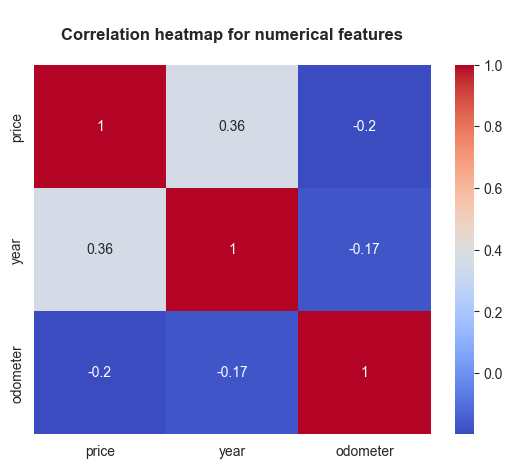

In [32]:
# Display correlation matrix for values that are of dtype int64 only.

corrmatrix = cars_cleaned.corr(numeric_only=True)
corrmatrix.style.background_gradient(cmap='coolwarm')

# Visualize correlation matrix in heatmap.

fig0, ax1 = plt.subplots()
plt.title('\nCorrelation heatmap for numerical features\n',fontweight='bold')
sns.heatmap(corrmatrix,annot=True, cmap='coolwarm')
plt.show(fig0)
fig0.savefig('data/images/correlation_heatmap.png',dpi=100,bbox_inches = 'tight')
plt.close(fig0)

1. There's a moderate positive correlation between price and year. This suggests that, generally, as the year of the vehicle increases (newer vehicles), the price tends to increase.
2. There's a weak negative correlation between price and odometer. This suggests that as the odometer reading (mileage) increases, the price tends to decrease slightly.
3. There's a weak negative correlation between year and odometer. This suggests that newer vehicles (higher year) tend to have slightly lower odometer readings.

In [33]:
# Print out the top 15 brands in terms of vehicle count
main_manufacturers = cars_cleaned['manufacturer'].value_counts().head(15)
main_manufacturers

manufacturer
ford             31641
chevrolet        27441
toyota           17864
honda            11104
nissan            9542
jeep              8915
bmw               8446
gmc               8276
ram               7205
dodge             6507
mercedes-benz     5973
volkswagen        5580
hyundai           5327
audi              4923
lexus             4830
Name: count, dtype: int64

In [34]:
# Print out the top selling types of cars in terms of count
bestsellers = cars_cleaned['type'].value_counts().head(15)
bestsellers

type
sedan          58900
SUV            46103
pickup         27054
truck          21426
coupe          14978
other          14438
hatchback      13408
wagon           6253
convertible     5785
van             5237
mini-van        3817
offroad          595
bus              365
Name: count, dtype: int64

SUVs and sedans are the best sellers.

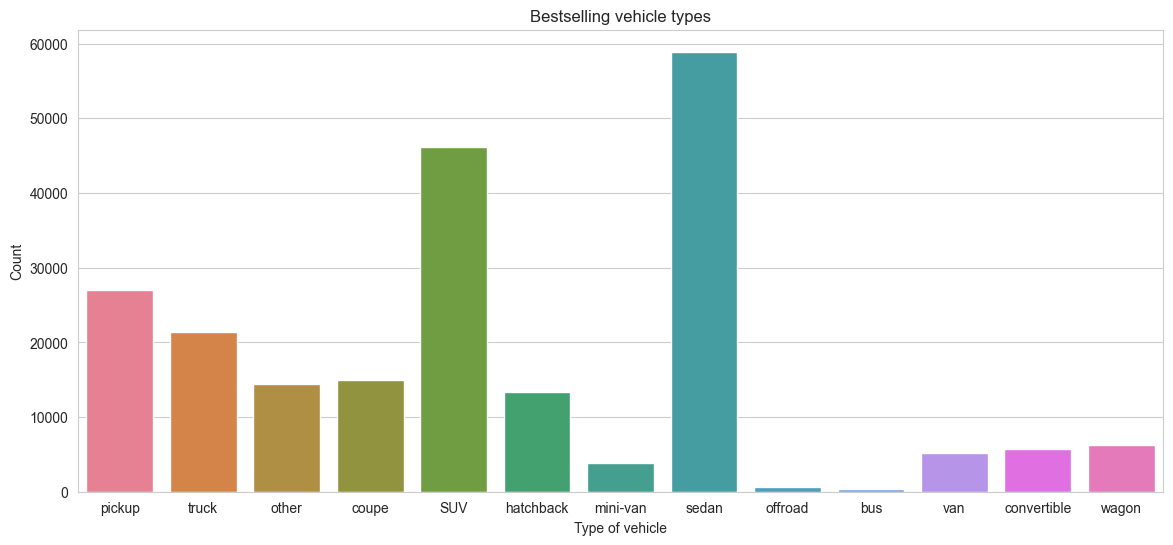

In [35]:
# Create the countplot
plt.figure(figsize=(14,6))
sns.countplot(x='type', data=cars_cleaned, hue='type',legend=False)
# Add labels and title
plt.xlabel('Type of vehicle')
plt.ylabel('Count')
plt.title('Bestselling vehicle types')

# Display the plot
plt.savefig('data/images/bestsellingvehicles.png',dpi=100,bbox_inches = 'tight')
plt.show()

In [36]:
# Now we do a groupby to group cars by type according to average price

cars_cleaned_grouped_by_typenprice_mean = cars_cleaned.groupby('type')['price'].mean().reset_index().sort_values(by='price', ascending=False)
cars_cleaned_grouped_by_typenprice_mean

,type,price
7,other,28009.779471
8,pickup,25655.009315
3,coupe,21152.412538
10,truck,20783.380566
2,convertible,17869.910977
11,van,17348.091846
6,offroad,15966.341176
1,bus,15605.786301
0,SUV,15522.089257
4,hatchback,15299.430116


In [37]:
# We remove cars that are of type 'other' as we do not know what these are

cars_cleaned.drop(cars_cleaned[cars_cleaned['type'] == 'other'].index, inplace = True)
print(cars_cleaned['type'].eq('other').sum())

0


In [38]:
# Now we do a groupby to group cars by type according to average price again to check

#cars_cleaned_grouped_by_typenprice_mean = cars_cleaned.groupby('type')['price'].mean().reset_index().sort_values(by='price', ascending=False)
#cars_cleaned_grouped_by_typenprice_mean

# Although pickups are #3 in terms of sales by count.. they are actually having the highest average price per sample as opposed to sedans and SUVs which are significantly lower in the list

In [39]:
# Quick check on the shape. Dataset is cleaner
cars_cleaned.shape


(203921, 15)

In [40]:
# We isolate the two best-selling types by count into separate dataframes

cars_grouped_SUV = cars_cleaned[cars_cleaned['type'] == 'SUV']
cars_grouped_sedan = cars_cleaned[cars_cleaned['type'] == 'sedan']

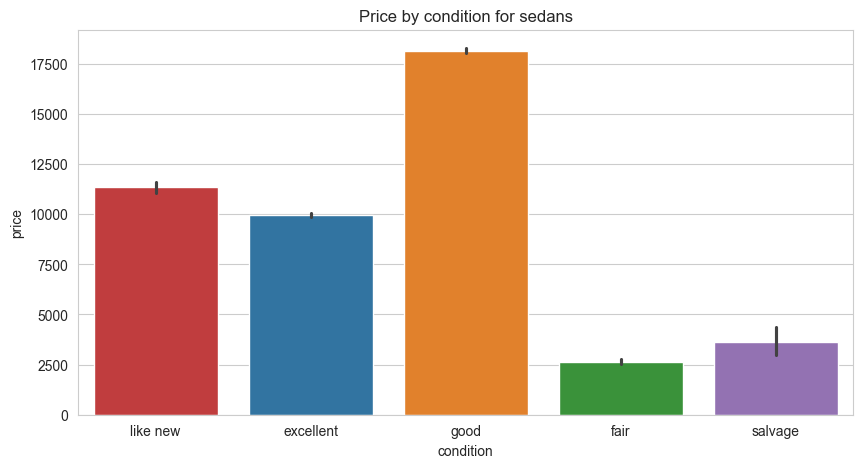

In [41]:
# We look at distribution of price by condition for sedans

plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=cars_grouped_sedan, order=['like new', 'excellent', 'good', 'fair', 'salvage'],hue='condition',legend=False)
plt.title('Price by condition for sedans')
plt.savefig('data/images/pricebyconditionforsedans.png',dpi=100,bbox_inches = 'tight')
plt.show()

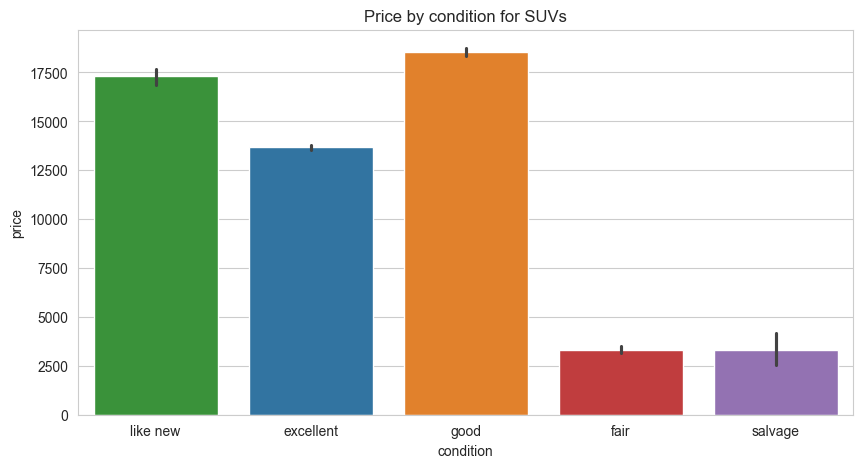

In [42]:
# We look at distribution of price by condition for SUVs
plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=cars_grouped_SUV, order=['like new', 'excellent', 'good', 'fair', 'salvage'],hue='condition',legend=False)
plt.title('Price by condition for SUVs')
plt.savefig('data/images/pricebyconditionforsuvs.png',dpi=100,bbox_inches = 'tight')
plt.show()

It is likely the case that regardless of type, new, excellent and good condition vehicles hold their value the best.

/var/folders/yf/b_jkz7b55gdc6znqs4hgp1v80000gn/T/ipykernel_61914/205752755.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_cars_cleaned = cars_cleaned[cars['manufacturer'].isin(top_car_brands_cleaned)]


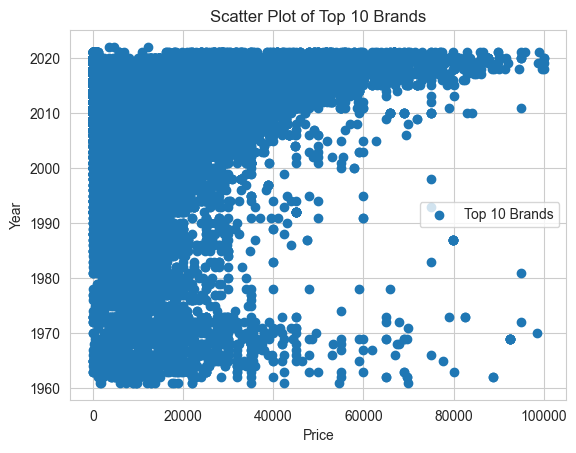

In [43]:
# Now we look at  scatter plot of the price of the cars according to their age
# Now we drop cars older than 1960

cars_cleaned.drop(cars_cleaned[cars_cleaned['year'] <= 1960].index, inplace = True)

top_car_brands_cleaned = cars_cleaned['manufacturer'].value_counts().head(10).index
top_cars_cleaned = cars_cleaned[cars['manufacturer'].isin(top_car_brands_cleaned)]

plt.scatter(top_cars_cleaned['price'], top_cars_cleaned['year'], marker='o', label='Top 10 Brands')
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Scatter Plot of Top 10 Brands')
plt.legend()
plt.savefig('data/images/spoftop10.png',dpi=100,bbox_inches = 'tight')
plt.show()

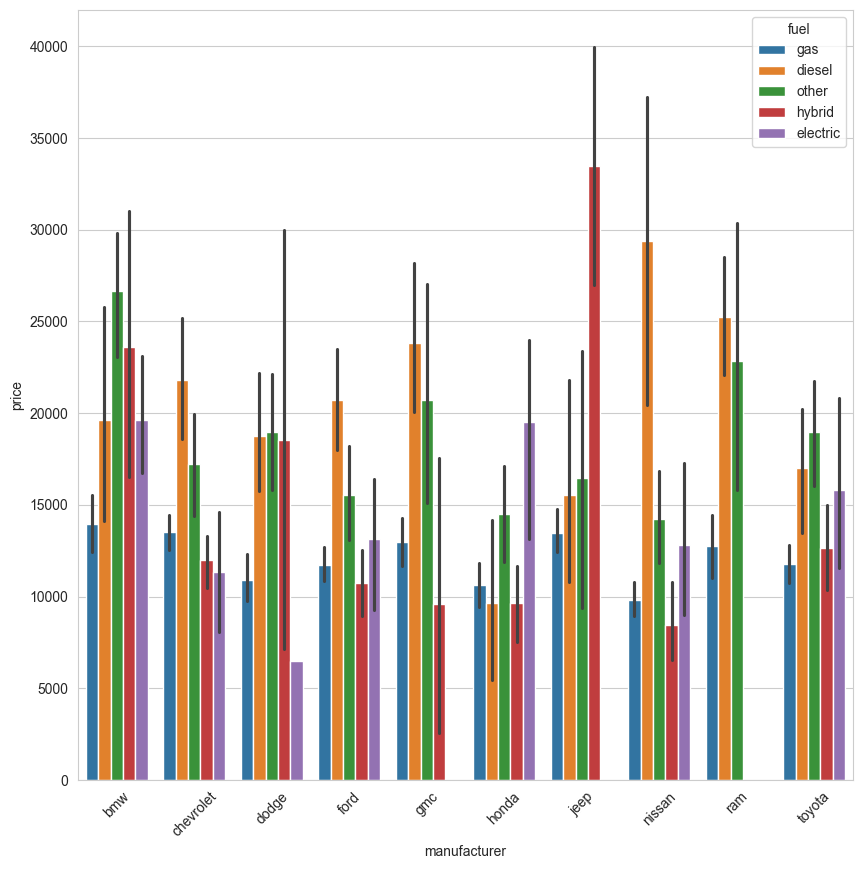

In [44]:
# For each manufacturer and model, fuel_type, list average price
avg_price = top_cars_cleaned.groupby(['manufacturer', 'type', 'year', 'fuel'])['price'].mean().reset_index()
avg_price

# plot average price for fuel type, for each manufacturer
# can we plot model as well?
plt.figure(figsize=(10,10))
sns.barplot(x='manufacturer', y='price', hue='fuel', data=avg_price)
plt.xticks(rotation=45)
plt.savefig('data/images/manuvspricevsfuel.png',dpi=100,bbox_inches = 'tight')
plt.show()

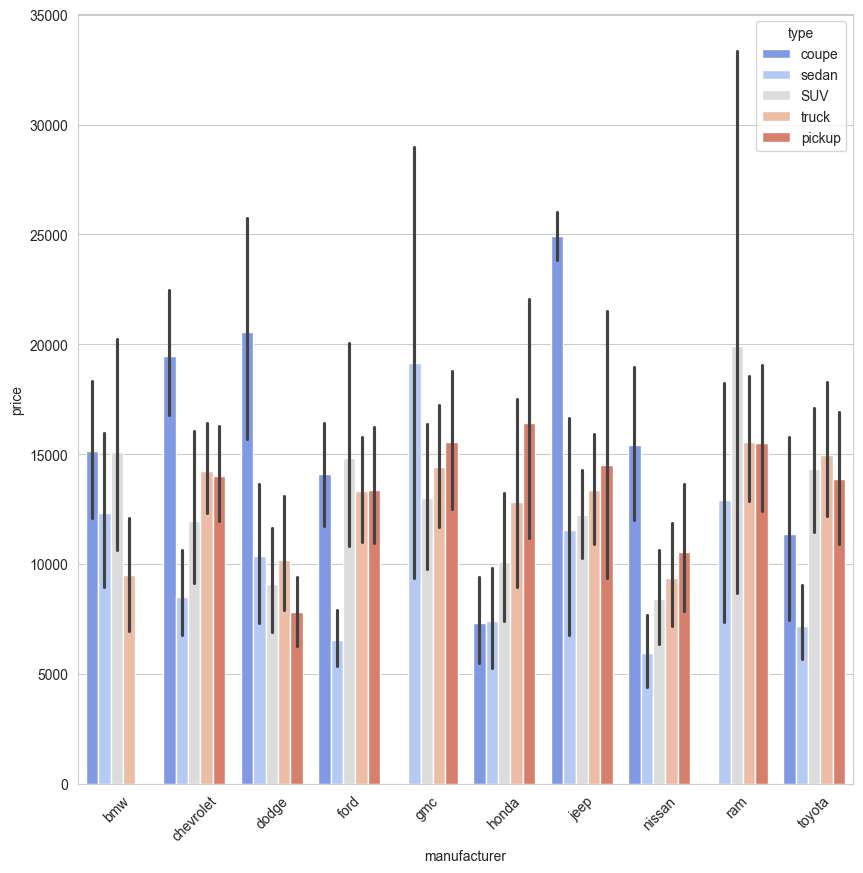

In [45]:
# Compare the same above for type of vehicle
avg_price = top_cars_cleaned.groupby(['manufacturer', 'year', 'type'])['price'].mean().reset_index()
# We look at the top 5 types
top_type = avg_price['type'].value_counts().head(5).index
avg_price = avg_price[avg_price['type'].isin(top_type)]

# Visualize
plt.figure(figsize=(10,10))
sns.barplot(x='manufacturer', y='price', hue='type', data=avg_price, palette="coolwarm")
plt.xticks(rotation=45)
plt.savefig('data/images/manuvspricevstype.png',dpi=100,bbox_inches = 'tight')
plt.show()

In [46]:
cars_grouped_SUV = cars_grouped_SUV[cars_grouped_SUV['year'] > 2000]
cars_grouped_SUV

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
46,auburn,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,SUV,NaN,al
49,auburn,32990,2020.0,jeep,wrangler sport suv 2d,good,NaN,gas,20581.0,clean,other,4wd,SUV,silver,al
72,auburn,33990,2017.0,jeep,wrangler unlimited sahara,good,6 cylinders,other,34152.0,clean,other,4wd,SUV,white,al
76,auburn,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,4wd,SUV,blue,al
92,auburn,19990,2015.0,infiniti,qx60 3.5 sport utility,good,NaN,other,96003.0,clean,other,NaN,SUV,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426817,wyoming,20590,2018.0,ford,edge se sport utility 4d,good,NaN,gas,37164.0,clean,other,fwd,SUV,black,wy
426823,wyoming,37590,2018.0,mercedes-benz,gle 350 sport,good,6 cylinders,gas,16482.0,clean,automatic,rwd,SUV,black,wy
426857,wyoming,41990,2019.0,toyota,4runner limited sport,good,6 cylinders,gas,36630.0,clean,other,4wd,SUV,white,wy
426864,wyoming,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,NaN,SUV,black,wy


In [47]:
# Drop other features like manufacturer, model, cylinders, size & title_Status
cars_cleaned = cars_cleaned.drop(columns=['model','manufacturer','cylinders','state','region','transmission'],axis=1)

cars_cleaned['type'].value_counts()
cars_cleaned['type'] = cars_cleaned['type'].astype('category')
cars_cleaned['type'] = cars_cleaned['type'].cat.codes

cars_cleaned['condition'].value_counts()
cars_cleaned['condition'] = cars_cleaned['condition'].astype('category')
cars_cleaned['condition'] = cars_cleaned['condition'].cat.codes

cars_cleaned['fuel'].value_counts()
cars_cleaned['fuel'] = cars_cleaned['fuel'].astype('category')
cars_cleaned['fuel'] = cars_cleaned['fuel'].cat.codes

cars_cleaned['drive'].value_counts()
cars_cleaned['drive'] = cars_cleaned['drive'].astype('category')
cars_cleaned['drive'] = cars_cleaned['drive'].cat.codes

cars_cleaned['paint_color'].value_counts()
cars_cleaned['paint_color'] = cars_cleaned['paint_color'].astype('category')
cars_cleaned['paint_color'] = cars_cleaned['paint_color'].cat.codes

cars_cleaned['title_status'].value_counts()
cars_cleaned['title_status'] = cars_cleaned['title_status'].astype('category')
cars_cleaned['title_status'] = cars_cleaned['title_status'].cat.codes

cars_cleaned.head()

,price,year,condition,fuel,odometer,title_status,drive,type,paint_color
27,33590,2014.0,2,2,57923.0,0,-1,7,10
28,22590,2010.0,2,2,71229.0,0,-1,7,1
29,39590,2020.0,2,2,19160.0,0,-1,7,8
30,30990,2017.0,2,2,41124.0,0,-1,7,8
31,15000,2013.0,0,2,128000.0,0,2,9,0


In [48]:
# We cut down the list to only the last 2 decades
cars_cleaned = cars_cleaned[cars_cleaned['year'] > 2000]

# We drop outliers
cars_cleaned = cars_cleaned[(cars_cleaned['price'] > 1000) & (cars_cleaned['price'] < 100000)]

# 2021 has too little details and it's presumably still starting the year for this dataset. So we drop the data for that
cars_cleaned = cars_cleaned[cars_cleaned['year'] < 2021]

# Drop any other NaN values inplace
cars_cleaned.dropna(inplace=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [49]:
# Look at a sample of the clean dataset

cars_cleaned.sample(5).sort_values(by='price', ascending=False)

,price,year,condition,fuel,odometer,title_status,drive,type,paint_color
101184,33990,2019.0,2,2,11902.0,0,-1,0,8
205173,33590,2020.0,2,4,786.0,0,-1,8,10
332342,26990,2014.0,2,4,96454.0,0,2,8,8
294087,14811,2016.0,0,2,82915.0,0,0,0,0
407344,6999,2014.0,0,2,129987.0,0,1,5,9


In [50]:
# Define training and testing splits

target_feature = 'price'
numerical_features = ['year','odometer']
categorical_features = ['condition','drive','fuel','type','paint_color','title_status']
X = cars_cleaned[numerical_features+categorical_features]
y = cars_cleaned[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the relevant pre-processing pipelines for standardization, creating polynomial features & encoding categorical features

In [51]:
# Create preprocessing pipelines

# Transformer for numerical features
numerical_pipeline = Pipeline([('poly', PolynomialFeatures(degree=3,include_bias=False)),('scaler', StandardScaler())])
# Transformer for categorical features
categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])
# Preprocessor pipeline
preprocessor_pipeline = ColumnTransformer([('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)],remainder='drop')

### Create, train and evaluate a regular Linear Regression model

In [52]:
# Linear regression model

model1 = make_pipeline(preprocessor_pipeline, LinearRegression())

model1.fit(X_train, y_train)
model1_y_pred = model1.predict(X_test)

model1_test_mse = mean_squared_error(y_test, model1_y_pred)
model1_r2_score = r2_score(y_test, model1_y_pred)

print(f"\nModel 1 - Linear Regression model - Mean Squared Error = {model1_test_mse:.2f}")
print(f"Model 1 - Linear Regression model - R2 Score = {model1_r2_score:.4f}\n")


Model 1 - Linear Regression model - Mean Squared Error = 48921736.49
Model 1 - Linear Regression model - R2 Score = 0.7035



/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


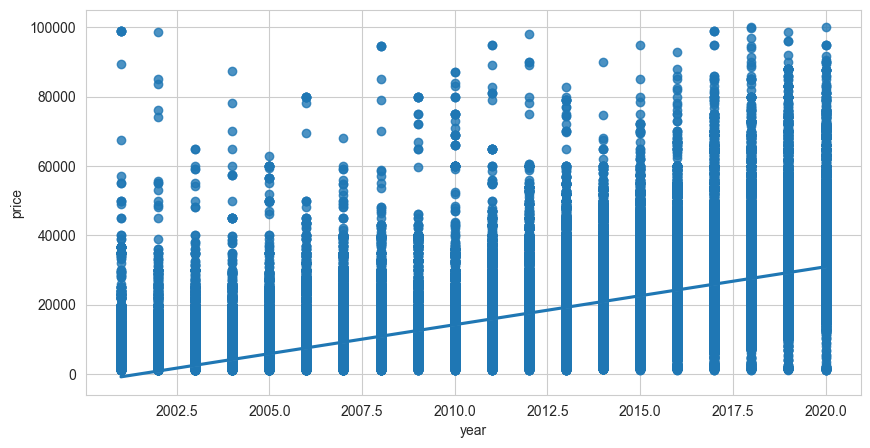

In [53]:
plt.figure(figsize=(10,5))
sns.regplot(x='year',y='price',data=cars_cleaned)
plt.savefig('data/images/lr.png',dpi=100,bbox_inches = 'tight')
plt.show()

### Create, train and evaluate a regular Polynomial Regression model

In [54]:
# Reset preprocessing pipelines

# Transformer for numerical features
numerical_pipeline = Pipeline([('poly', PolynomialFeatures(include_bias=False)),('scaler', StandardScaler())])
# Transformer for categorical features
categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])
# Preprocessor pipeline
preprocessor_pipeline = ColumnTransformer([('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)],remainder='drop')

In [55]:
# Polynomial regression model with PCA

model2 = Pipeline([('preprocessor', preprocessor_pipeline),('pca', PCA(LinearRegression())),('regressor',LinearRegression())])

# Parameter grid for GridSearchCV
param_grid = {'preprocessor__num__poly__degree': [2,3],'pca__n_components':[2,4,6,8,10]}

# Create GridSearchCV with Model 2 and train it
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model details and use it for predictions
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Score Model 2's ability to predict
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\nModel 2 - Polynomial Regression model - Mean Squared Error = {test_mse:.2f}")
print(f"Model 2 - Polynomial Regression model - R2 Score = {test_r2:.4f}\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/li


Model 2 - Polynomial Regression model - Mean Squared Error = 61054437.26
Model 2 - Polynomial Regression model - R2 Score = 0.6300



/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


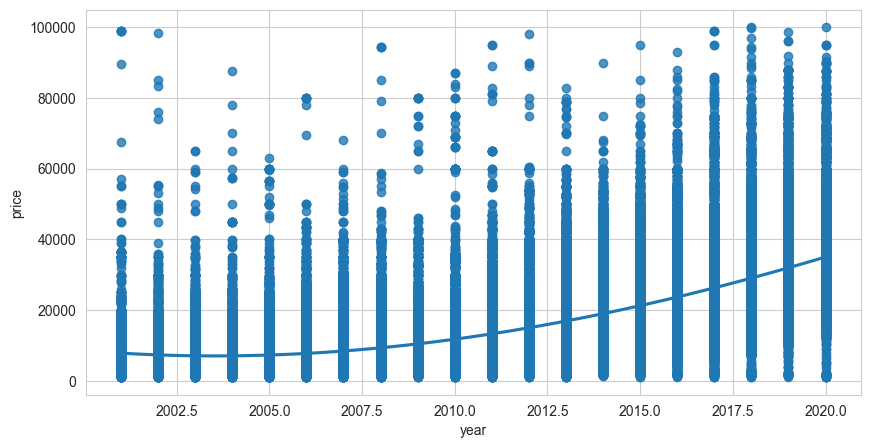

In [56]:
plt.figure(figsize=(10,5))
sns.regplot(x='year',y='price',data=cars_cleaned, order=3)
plt.savefig('data/images/pr.png',dpi=100,bbox_inches = 'tight')
plt.show()

In [57]:
# convert categorical variables to one hot encoding
cars_cleaned = pd.get_dummies(cars_cleaned, columns=['condition','drive','fuel','type','paint_color','title_status'])

cars_cleaned.head()

,price,year,odometer,condition_0,condition_1,condition_2,condition_3,condition_4,drive_-1,drive_0,...,paint_color_9,paint_color_10,paint_color_11,title_status_-1,title_status_0,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5
27,33590,2014.0,57923.0,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
28,22590,2010.0,71229.0,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
29,39590,2020.0,19160.0,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
30,30990,2017.0,41124.0,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
31,15000,2013.0,128000.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
cars_cleaned_scaled = (cars_cleaned - cars_cleaned.mean())/cars_cleaned.std()

#Preparation for PCA
U, sigma, VT = svd(cars_cleaned_scaled, full_matrices=False)
percent_variance_explained = sigma/sigma.sum()
cumulative_variance_ratio = np.cumsum(sigma)/sigma.sum()

#Identify number of components needed to achieve at least 80% variance
num_of_components_over_80pct_variance = int((np.cumsum(percent_variance_explained) < .8).sum())
print(f"Number of components needed to achieve at least 80% variance: {num_of_components_over_80pct_variance}")

Number of components needed to achieve at least 80% variance: 32


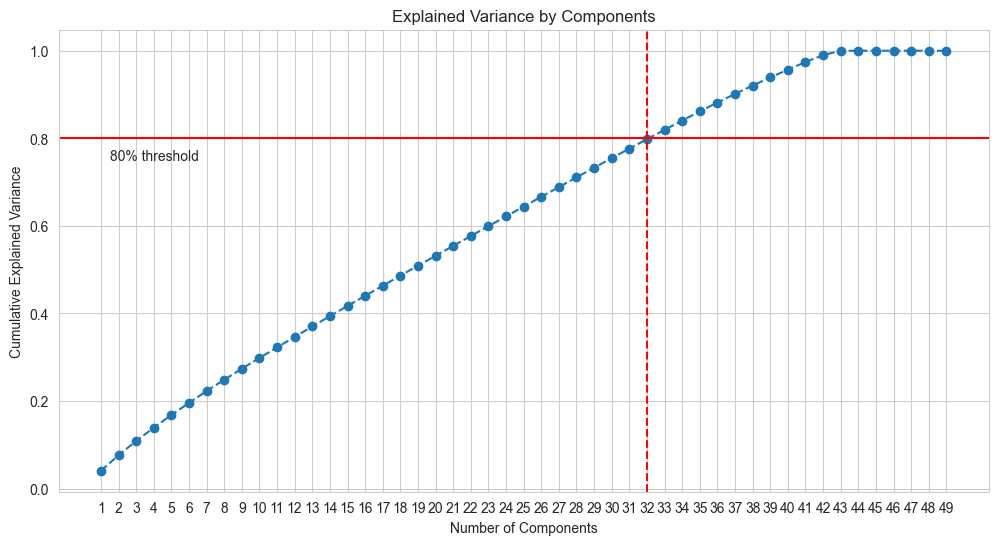

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% threshold')
plt.axvline(x=num_of_components_over_80pct_variance-1, color='r', linestyle='--')
plt.xticks(np.arange(len(cumulative_variance_ratio)), np.arange(1, len(cumulative_variance_ratio)+1))
plt.grid(True)
plt.savefig('data/images/variance.png',dpi=100,bbox_inches = 'tight')

In [60]:
#Extracting the Components
pca = PCA(n_components = num_of_components_over_80pct_variance)
pca.fit(cars_cleaned_scaled)
components = pca.transform(cars_cleaned_scaled)

# The loadings are the components_ attribute of the PCA object, but these need to be scaled by the square root of the eigenvalues (explained_variance_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame of loadings with rows corresponding to features and columns to components
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=cars_cleaned.columns)
loading_matrix

/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/seanlingham/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value enc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
price,0.672897,-0.397023,-0.077199,0.019042,0.174211,0.018086,0.323769,-0.025268,0.013438,-0.015284,...,0.003281,0.008972,0.024020,0.031364,0.039422,-0.028569,-0.007204,0.001671,0.047943,0.020007
year,0.593761,-0.004370,-0.299604,0.156716,0.093833,-0.003814,0.494377,0.003716,-0.076418,0.058461,...,0.002660,0.004090,-0.004279,0.013364,0.034060,-0.016654,-0.012375,-0.023683,-0.005422,0.016746
odometer,-0.408670,-0.079877,0.240282,-0.127542,-0.200551,0.022298,-0.404807,0.087585,0.064856,0.011739,...,-0.040754,0.030975,-0.019233,0.053223,-0.062174,0.065208,0.029653,0.049681,-0.046055,-0.000218
condition_0,-0.592666,-0.258567,-0.129759,0.006766,-0.050049,0.435937,0.209768,-0.193974,0.117354,0.048861,...,0.061690,0.005747,0.010339,0.021256,0.017194,-0.067518,-0.066553,-0.050869,0.055586,-0.020562
condition_1,-0.144664,0.017248,0.107943,-0.084341,-0.081228,-0.116364,-0.299522,0.095151,0.037115,-0.009289,...,0.055840,0.027870,-0.114642,-0.120554,0.027518,-0.079049,0.251055,-0.305073,0.149025,-0.038978
condition_2,0.672413,0.268748,0.062500,0.048610,0.028833,-0.271280,-0.312153,0.152213,-0.072333,-0.098774,...,-0.071694,0.085848,-0.003565,0.003494,-0.000560,0.110161,-0.004869,0.204123,-0.137302,0.041895
condition_3,-0.098326,-0.036183,0.083355,-0.046737,0.078154,-0.193708,0.347602,0.017369,-0.101863,0.033371,...,0.002452,-0.178428,0.037289,0.006743,-0.049535,-0.041144,0.024216,-0.148524,0.086866,-0.029221
condition_4,-0.056837,-0.004842,-0.095539,-0.131220,-0.033118,-0.308946,-0.115571,0.070406,0.049715,0.489065,...,-0.049783,-0.024001,0.016092,0.019164,0.053386,-0.036285,-0.057904,0.002733,-0.004556,0.048862
drive_-1,0.418143,0.007631,-0.415696,0.134381,0.014015,0.176800,-0.316907,0.181930,0.057619,0.039278,...,-0.082874,-0.028397,-0.018817,-0.071218,-0.030291,0.069840,-0.063431,-0.002053,0.003260,-0.191370
drive_0,-0.196810,-0.696876,0.165154,0.352293,-0.194495,-0.209742,0.084320,-0.002085,0.025058,-0.027125,...,0.018688,-0.000318,-0.006966,-0.030948,0.012469,-0.018476,0.064900,-0.000804,0.013895,0.112731


In [61]:
# Sort the features with the highest loadings for each component
sorted_indices = {f'PC{i+1}': loading_matrix[f'PC{i+1}'].abs().sort_values(ascending=False).index
                  for i in range(loading_matrix.shape[1])}

#select the top 3 features for each component
loading_matrix_sorted_all = pd.DataFrame(sorted_indices)
loading_matrix_sorted_all = loading_matrix_sorted_all[:3]

loading_matrix_sorted_all

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,price,drive_1,title_status_0,type_0,drive_2,paint_color_-1,year,paint_color_10,type_8,condition_4,...,paint_color_2,title_status_1,paint_color_7,title_status_3,title_status_2,title_status_3,fuel_1,type_6,paint_color_3,paint_color_11
1,condition_2,drive_0,title_status_-1,drive_2,fuel_2,condition_0,odometer,type_3,paint_color_0,paint_color_8,...,type_6,paint_color_4,paint_color_4,paint_color_6,paint_color_3,paint_color_4,title_status_1,type_11,type_11,type_10
2,fuel_4,type_8,paint_color_-1,fuel_0,type_3,title_status_5,condition_3,type_7,type_4,title_status_5,...,paint_color_4,title_status_4,type_5,paint_color_2,fuel_1,type_6,title_status_2,paint_color_6,type_7,type_1


In [62]:
# Linear regression model with top principal components

X = components
y = cars_cleaned['price']

model3 = make_pipeline(preprocessor_pipeline, LinearRegression())

model3.fit(X_train, y_train)
model3_y_pred = model1.predict(X_test)

model3_test_mse = mean_squared_error(y_test, model1_y_pred)
model3_r2_score = r2_score(y_test, model1_y_pred)

print(f"\nModel 1 - Linear Regression model - Mean Squared Error = {model1_test_mse:.2f}")
print(f"Model 1 - Linear Regression model - R2 Score = {model1_r2_score:.4f}\n")


Model 1 - Linear Regression model - Mean Squared Error = 48921736.49
Model 1 - Linear Regression model - R2 Score = 0.7035



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.



---
<br>

32 components needed to achieve 80% variance. The top 3 features that affect used car prices are -

* Condition, price & age respectively.

Some other observations from EDA process -

1. Vehicles from Ford, Chevy & Toyota are the most popular as these 3 are the most popular manufacturers respectively.
2. Their diesel vehicles are the highest priced amongst all the types they sell.
3. Most popular vehicles are SUVs & sedans.
4. Electric and hybrid vehicles from Jeep are the highest priced vehicles.
5. The condition of the car matters the most. Only cars that are in 'like new', 'excellent' or 'good condition' hold any value.
6. Cars that are dated in the last 5 or so years hold the most value. Anything older drops price significantly.
7. Only cars with clean title status have reasonable value.
8. White color cars seems to be the most popular.

<br>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

---
<br>

The recommendations to the client are -

1. Stock up on diesel SUV & sedans from Ford, Chevy & Toyota respectively.
2. Ensure they are in 'like new', 'excellent' or 'good condition' in that order of preference.
3. Ensure that they are dated within the last 5 years.
4. Where possible, try to pick up cars that are white or black. Avoid cars with odd colors such as purple.

<br>